# BLOSUM

In [ ]:
# get blosum62 matrix
import numpy as np
from Bio.SubsMat import MatrixInfo

blosum62 = MatrixInfo.blosum62
blosum62_matrix = np.zeros((20, 20), dtype=np.float32)
amino_acids = 'ARNDCQEGHILKMFPSTWYV'
for i, aa1 in enumerate(amino_acids):
    for j, aa2 in enumerate(amino_acids):
        blosum_value = blosum62.get((aa1, aa2), blosum62.get((aa2, aa1), 0))
        blosum62_matrix[i, j] = blosum_value    
blosum62_matrix = blosum62_matrix + blosum62_matrix.T  # make it symmetric
blosum62_matrix = blosum62_matrix / 2  # average the values
blosum62_matrix = blosum62_matrix.astype(np.float16)  # convert to float16


/home/t-alptartici/miniconda3/envs/inv_fold/lib/python3.9/site-packages/Bio/SubsMat/__init__.py:126: BiopythonDeprecationWarning: Bio.SubsMat has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.substitution_matrices as a replacement, and contact the Biopython developers if you still need the Bio.SubsMat module.
  warnings.warn(


In [2]:
# save blosum62 matrix
np.save('blosum62_matrix.npy', blosum62_matrix)

In [2]:
import numpy as np

In [ ]:
# load the matrix
blosum62_matrix = np.load('blosum62_matrix.npy')
amino_acids = 'ARNDCQEGHILKMFPSTWYV'
# convert to DataFrame
import pandas as pd


In [57]:
blosum62_matrix[-1]

array([ 0., -3., -3., -3., -1., -2., -2., -3., -3.,  3.,  1., -2.,  1.,
       -1., -2., -2.,  0., -3., -1.,  4.], dtype=float16)

In [33]:
# I want to softmax them by row, so that each row sums to 1.
def softmax(matrix):
    exp_matrix = np.exp(matrix - np.max(matrix, axis=1, keepdims=True))
    return exp_matrix / np.sum(exp_matrix, axis=1, keepdims=True) 


In [34]:
blosum62_softmax = softmax(blosum62_matrix)

In [59]:
blosum62_softmax

array([[8.3984e-01, 5.6572e-03, 2.0828e-03, 2.0828e-03, 1.5381e-02,
        5.6572e-03, 5.6572e-03, 1.5381e-02, 2.0828e-03, 5.6572e-03,
        5.6572e-03, 5.6572e-03, 5.6572e-03, 2.0828e-03, 5.6572e-03,
        4.1809e-02, 1.5381e-02, 7.6580e-04, 2.0828e-03, 1.5381e-02],
       [2.2449e-03, 9.0527e-01, 6.0997e-03, 8.2541e-04, 3.0375e-04,
        1.6571e-02, 6.0997e-03, 8.2541e-04, 6.0997e-03, 3.0375e-04,
        8.2541e-04, 4.5074e-02, 2.2449e-03, 3.0375e-04, 8.2541e-04,
        2.2449e-03, 2.2449e-03, 3.0375e-04, 8.2541e-04, 3.0375e-04],
       [3.2353e-04, 2.3899e-03, 9.6436e-01, 6.4964e-03, 1.1897e-04,
        2.3899e-03, 2.3899e-03, 2.3899e-03, 6.4964e-03, 1.1897e-04,
        1.1897e-04, 2.3899e-03, 3.2353e-04, 1.1897e-04, 3.2353e-04,
        6.4964e-03, 2.3899e-03, 4.3809e-05, 3.2353e-04, 1.1897e-04],
       [3.2377e-04, 3.2377e-04, 6.5002e-03, 9.6533e-01, 1.1909e-04,
        2.3937e-03, 1.7670e-02, 8.7976e-04, 8.7976e-04, 1.1909e-04,
        4.3809e-05, 8.7976e-04, 1.1909e-04, 1

In [60]:
blosum62_softmax.shape

(20, 20)

In [61]:
np.sum(blosum62_softmax[1])

np.float16(1.0)

In [62]:
np.sum(blosum62_softmax[-6])

np.float16(1.0)

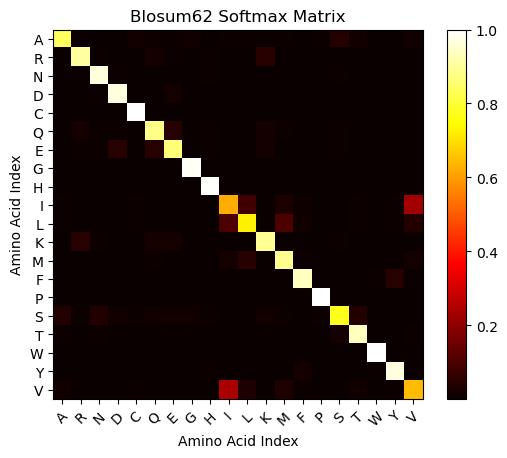

In [63]:
import matplotlib.pyplot as plt
plt.imshow(blosum62_softmax, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Blosum62 Softmax Matrix')
plt.xlabel('Amino Acid Index')
plt.ylabel('Amino Acid Index')
plt.xticks(ticks=np.arange(20), labels=list(amino_acids), rotation=45)
plt.yticks(ticks=np.arange(20), labels=list(amino_acids))
plt.show()

"import matplotlib.pyplot as plt\nimport numpy as np\nplt.imshow(np.log10(blosum62_softmax + 1e-10), cmap='hot', interpolation='nearest')\nplt.colorbar()\nplt.title('Blosum62 Softmax Matrix')\nplt.xlabel('Amino Acid Index')\nplt.ylabel('Amino Acid Index')\nplt.xticks(ticks=np.arange(20), labels=list(amino_acids), rotation=45)\nplt.yticks(ticks=np.arange(20), labels=list(amino_acids))\nplt.show()  "

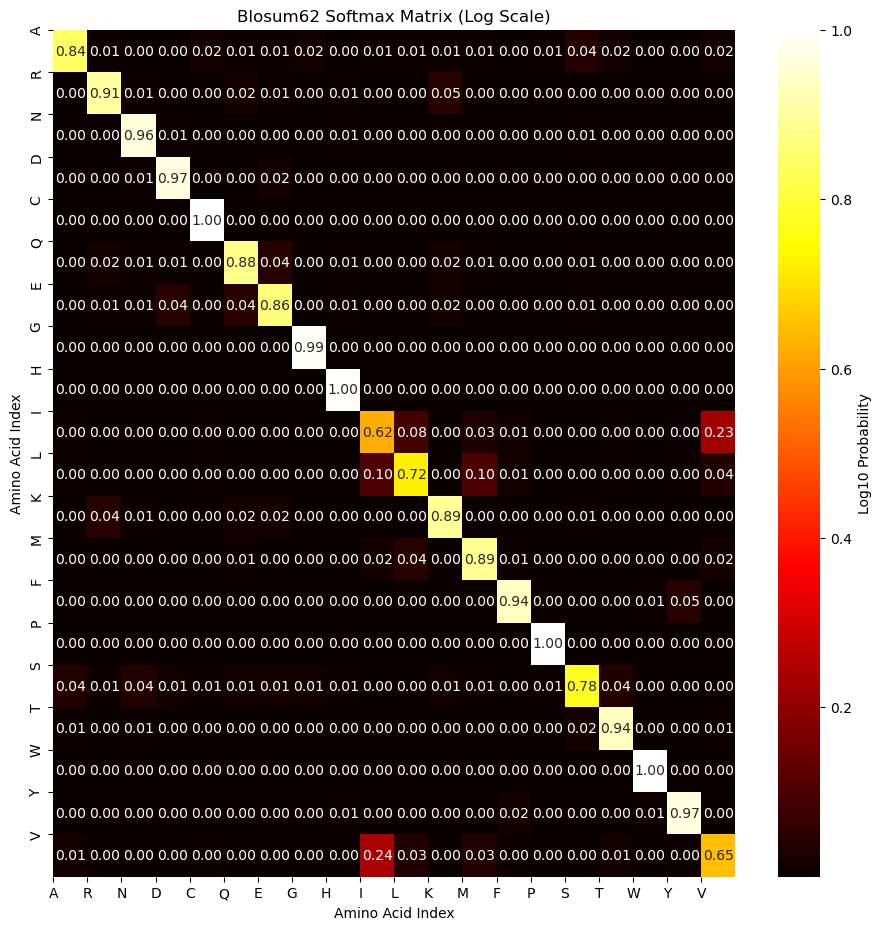

In [75]:
# plot in log scale for better visibility but we also want to see the numbers for entries
# maybe try seaborn heatmap
# make it larger    
import seaborn as sns
plt.figure(figsize=(11, 11))
sns.heatmap(blosum62_softmax, cmap='hot', annot=True, fmt=".2f", cbar_kws={'label': 'Log10 Probability'})
plt.title('Blosum62 Softmax Matrix (Log Scale)')
plt.xlabel('Amino Acid Index')
plt.ylabel('Amino Acid Index')   
plt.xticks(ticks=np.arange(20), labels=list(amino_acids), ha='center')
plt.yticks(ticks=np.arange(20), labels=list(amino_acids)) 
"""import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.log10(blosum62_softmax + 1e-10), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Blosum62 Softmax Matrix')
plt.xlabel('Amino Acid Index')
plt.ylabel('Amino Acid Index')
plt.xticks(ticks=np.arange(20), labels=list(amino_acids), rotation=45)
plt.yticks(ticks=np.arange(20), labels=list(amino_acids))
plt.show()  """

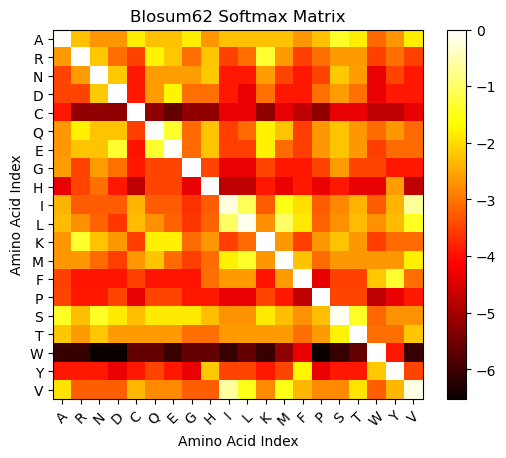

In [ ]:
# plot in log scale for better visibility but we also want to see the numbers
import matplotlib.pyplot as plt
import numpy as np  
plt.imshow(np.log10(blosum62_softmax + 1e-10), cmap='hot', interpolation='nearest')
plt.colorbar()      
plt.title('Blosum62 Softmax Matrix')
plt.xlabel('Amino Acid Index')
plt.ylabel('Amino Acid Index')
plt.xticks(ticks=np.arange(20), labels=list(amino_acids), rotation=45)
plt.yticks(ticks=np.arange(20), labels=list(amino_acids))
plt.show()

# tanimoto

In [60]:

from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [61]:
dict_smiles = {
    'A': 'C[C@@H](C(=O)O)N',
    'R': 'C(C[C@@H](C(=O)O)N)CN=C(N)N',
    'N': 'C([C@@H](C(=O)O)N)C(=O)N',
    'D': 'C([C@@H](C(=O)O)N)C(=O)O',
    'C': 'C([C@@H](C(=O)O)N)S',
    'Q': 'C(CC(=O)N)[C@@H](C(=O)O)N',
    'E': 'C(CC(=O)O)[C@@H](C(=O)O)N',
    'G': 'C(C(=O)O)N',  
    'H': 'C1=C(NC=N1)C[C@@H](C(=O)O)N',
    'I': 'CC[C@H](C)[C@@H](C(=O)O)N',
    'L': 'CC(C)C[C@@H](C(=O)O)N',
    'K': 'C(CCN)C[C@@H](C(=O)O)N',
    'M': 'CSCC[C@@H](C(=O)O)N',
    'F': 'C1=CC=C(C=C1)C[C@@H](C(=O)O)N',
    'P': 'C1C[C@H](NC1)C(=O)O',
    'S': 'C([C@@H](C(=O)O)N)O',
    'T': 'C[C@H]([C@@H](C(=O)O)N)O',
    'W': 'C1=CC=C2C(=C1)C(=CN2)C[C@@H](C(=O)O)N',
    'Y': 'C1=CC(=CC=C1C[C@@H](C(=O)O)N)O',
    'V': 'CC(C)[C@@H](C(=O)O)N',
}


In [62]:
# save to json file
import json
with open('amino_acid_smiles.json', 'w') as f:
    json.dump(dict_smiles, f)

## morgan fp

In [63]:

mols = {name: Chem.MolFromSmiles(smiles) for name, smiles in dict_smiles.items()}
fps = {name: AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024) for name, mol in mols.items()}


[17:58:39] DEPRECATION WARNING: please use MorganGenerator
[17:58:39] DEPRECATION WARNING: please use MorganGenerator
[17:58:39] DEPRECATION WARNING: please use MorganGenerator
[17:58:39] DEPRECATION WARNING: please use MorganGenerator
[17:58:39] DEPRECATION WARNING: please use MorganGenerator
[17:58:39] DEPRECATION WARNING: please use MorganGenerator
[17:58:39] DEPRECATION WARNING: please use MorganGenerator
[17:58:39] DEPRECATION WARNING: please use MorganGenerator
[17:58:39] DEPRECATION WARNING: please use MorganGenerator
[17:58:39] DEPRECATION WARNING: please use MorganGenerator
[17:58:39] DEPRECATION WARNING: please use MorganGenerator
[17:58:39] DEPRECATION WARNING: please use MorganGenerator
[17:58:39] DEPRECATION WARNING: please use MorganGenerator
[17:58:39] DEPRECATION WARNING: please use MorganGenerator
[17:58:39] DEPRECATION WARNING: please use MorganGenerator
[17:58:39] DEPRECATION WARNING: please use MorganGenerator
[17:58:39] DEPRECATION WARNING: please use MorganGenerat

In [64]:
fps

{'A': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x77fac5c85d90>,
 'R': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x77fabc5aaff0>,
 'N': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x77fac5d12dc0>,
 'D': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x77fac5d11700>,
 'C': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x77fac5d13300>,
 'Q': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x77fac5d13680>,
 'E': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x77fac5d12c00>,
 'G': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x77fab7f7e570>,
 'H': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x77fab7f7cba0>,
 'I': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x77fab7f7db60>,
 'L': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x77fab7f7cd60>,
 'K': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x77fab7f7d930>,
 'M': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x77fab7f7fa70>,
 'F': <rdkit.DataStructs.cDataStructs.

In [65]:
# Compute pairwise Tanimoto similarity
names = list(fps.keys())
matrix = np.zeros((len(names), len(names)))

for i in range(len(names)):
    for j in range(len(names)):
        matrix[i, j] = DataStructs.TanimotoSimilarity(fps[names[i]], fps[names[j]])

# Convert to DataFrame for visualization
df_sim = pd.DataFrame(matrix, index=names, columns=names)


In [66]:
df_sim_morgan = pd.DataFrame(matrix, index=names, columns=names)

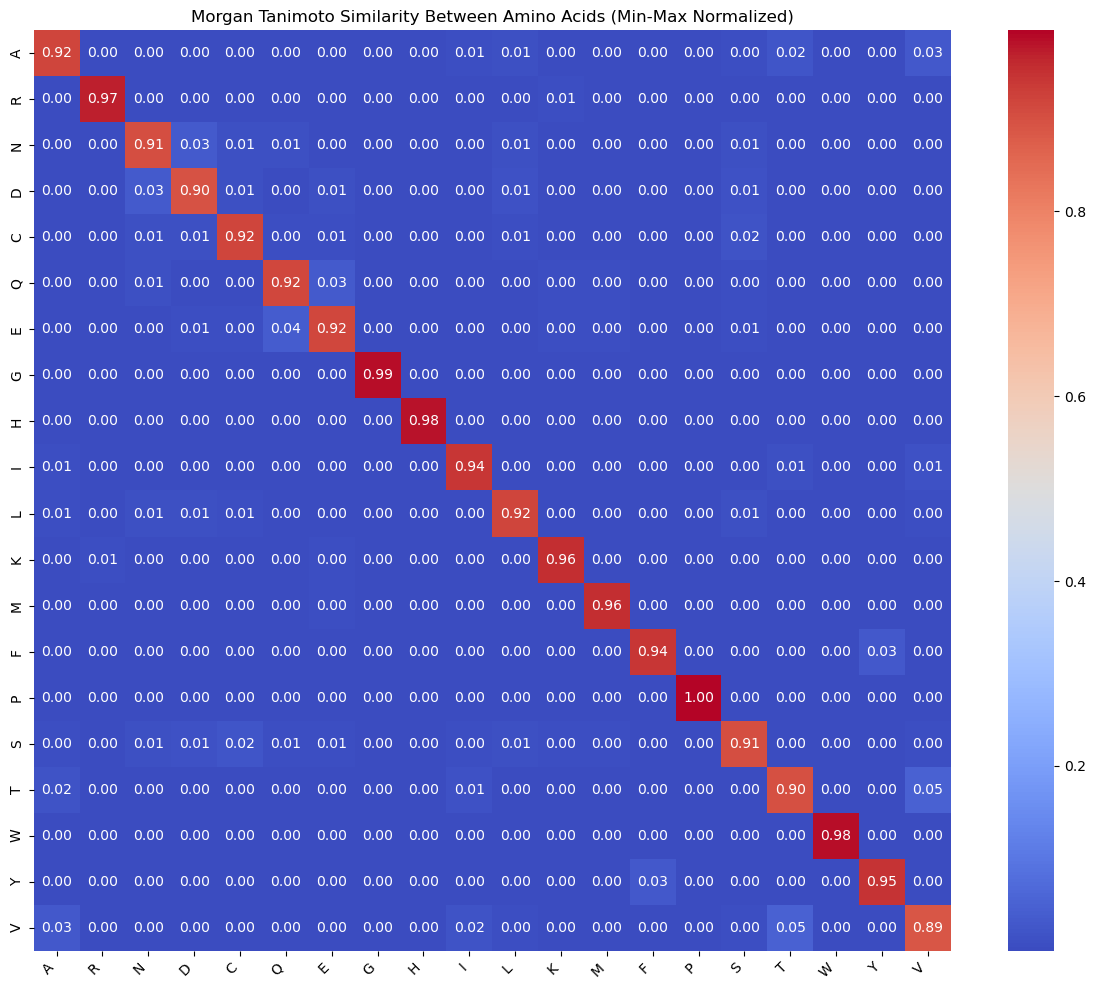

In [71]:
scaler = MinMaxScaler()
df_minmax_morgan = pd.DataFrame(scaler.fit_transform(df_sim_morgan), index=names, columns=names)
df_minmax_sm09_morgan = sigmoid(df_minmax_morgan, 0.9)
# column normalization
df_normalized_mm_sm09_morgan = df_minmax_sm09_morgan.div(df_minmax_sm09_morgan.sum(axis=0), axis=1)
df_normalized_mm_sm09_morgan.index = df_minmax_sm09_morgan.columns

plt.figure(figsize=(12, 10))
sns.heatmap(df_normalized_mm_sm09_morgan, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Morgan Tanimoto Similarity Between Amino Acids (Min-Max Normalized)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

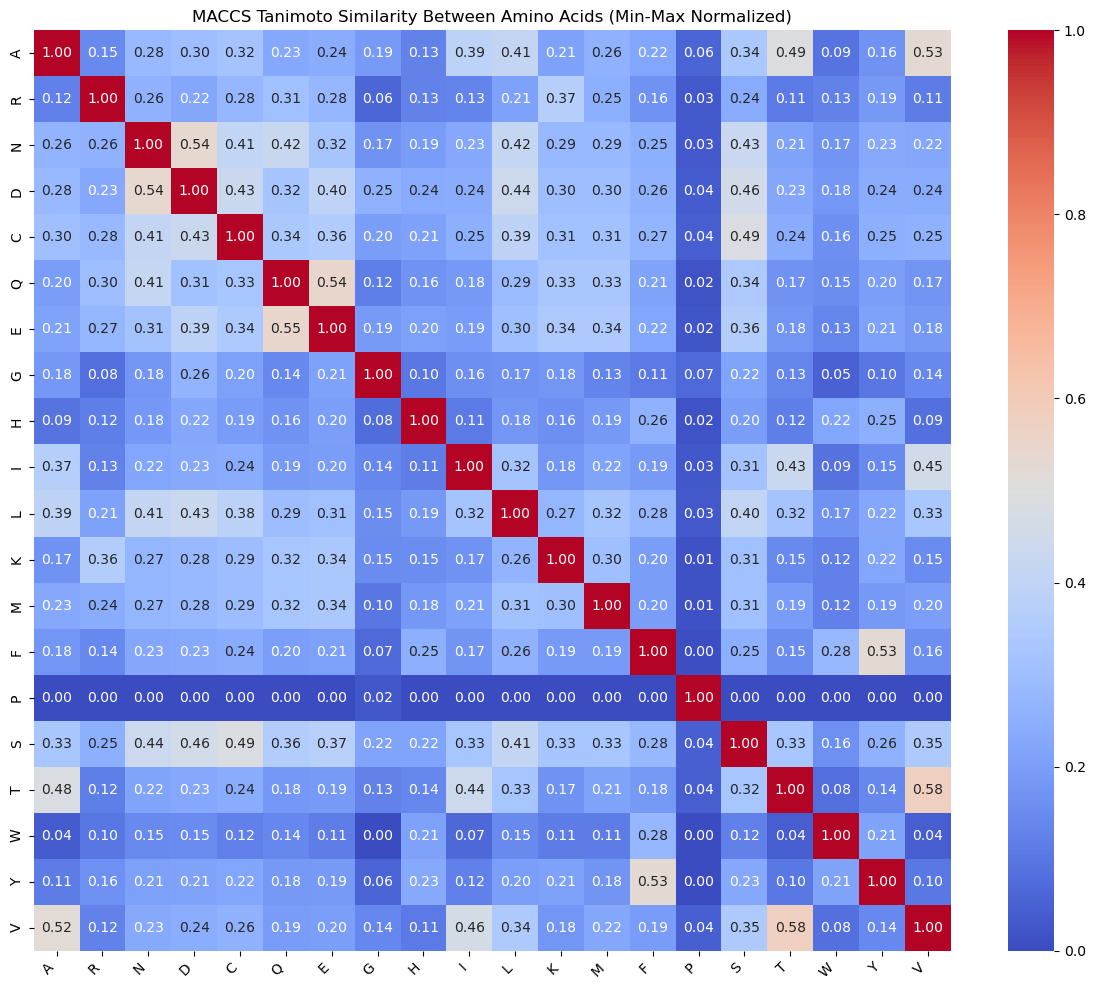

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_minmax_morgan, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Morgan Tanimoto Similarity Between Amino Acids (Min-Max Normalized)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## MACCS

In [4]:
# Step 1: Import required libraries
from rdkit import Chem
from rdkit.Chem import MACCSkeys, DataStructs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# Step 3: Convert SMILES to RDKit Mol objects and compute MACCS fingerprints
mols = {name: Chem.MolFromSmiles(smiles) for name, smiles in dict_smiles.items()}
fps = {name: MACCSkeys.GenMACCSKeys(mol) for name, mol in mols.items()}


In [9]:
# Step 4: Compute pairwise Tanimoto similarity matrix
names = list(fps.keys())
matrix_maccs = np.zeros((len(names), len(names)))

for i in range(len(names)):
    for j in range(len(names)):
        matrix_maccs[i, j] = DataStructs.TanimotoSimilarity(fps[names[i]], fps[names[j]])

matrix_maccs_softmax = softmax(matrix_maccs)

df_sim_maccs = pd.DataFrame(matrix_maccs, index=names, columns=names)
df_sim_maccs_softmax = pd.DataFrame(matrix_maccs_softmax, index=names, columns=names)


In [26]:
# get the sigmoid of the matrix and then softmax it


# have the sigmoid turning point be 0.9
def sigmoid(x, x_turning_point=0.9):
    return 1 / (1 + np.exp(-10 * (x - x_turning_point)))


# apply it on matrix_maccs  
matrix_maccs_sigmoid_softmax = softmax(sigmoid_0_9(matrix_maccs))
df_sim_maccs_sigmoid_softmax = pd.DataFrame(matrix_maccs_sigmoid_softmax, index=names, columns=names)


In [13]:
df_sim_maccs.to_csv('intermediates/df_sim_maccs.csv')

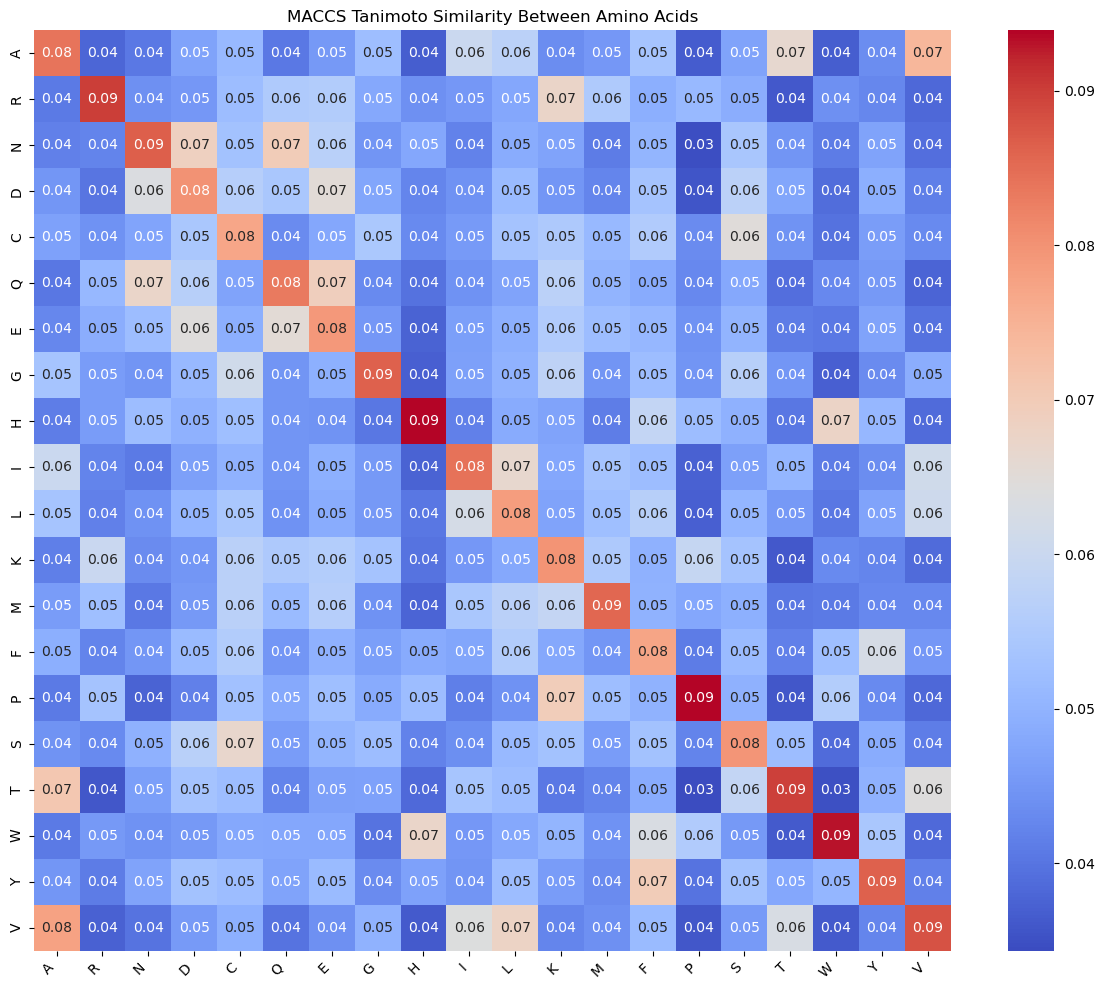

In [16]:
# Compute normalized matrix (smoothened distribution)
df_smoothed_one_hot = df_sim_maccs.div(df_sim_maccs.sum(axis=1), axis=0)

# Now smoothed_one_hot contains the smoothened version
df_smoothed_one_hot

plt.figure(figsize=(12, 10))
sns.heatmap(df_smoothed_one_hot, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('MACCS Tanimoto Similarity Between Amino Acids')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

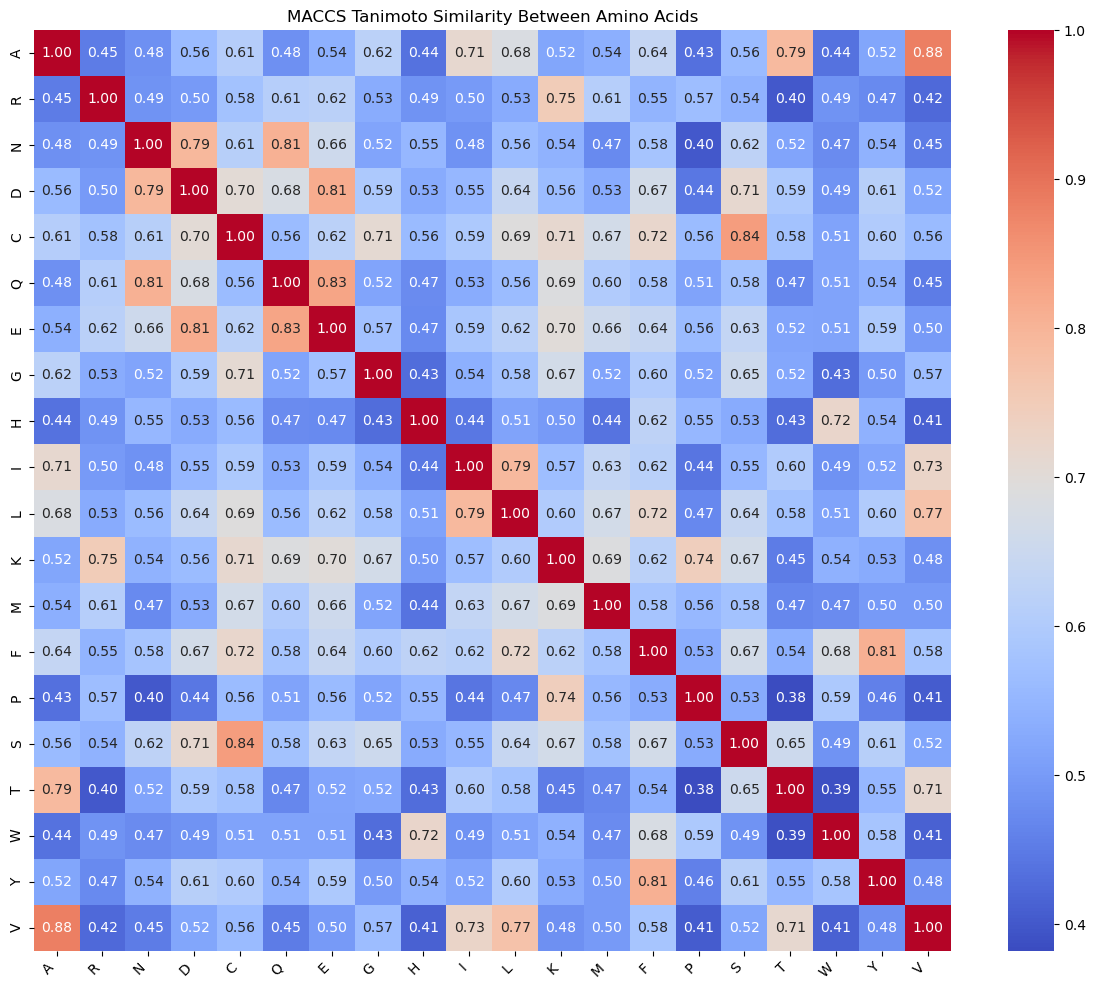

In [17]:

plt.figure(figsize=(12, 10))
sns.heatmap(df_sim, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('MACCS Tanimoto Similarity Between Amino Acids')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


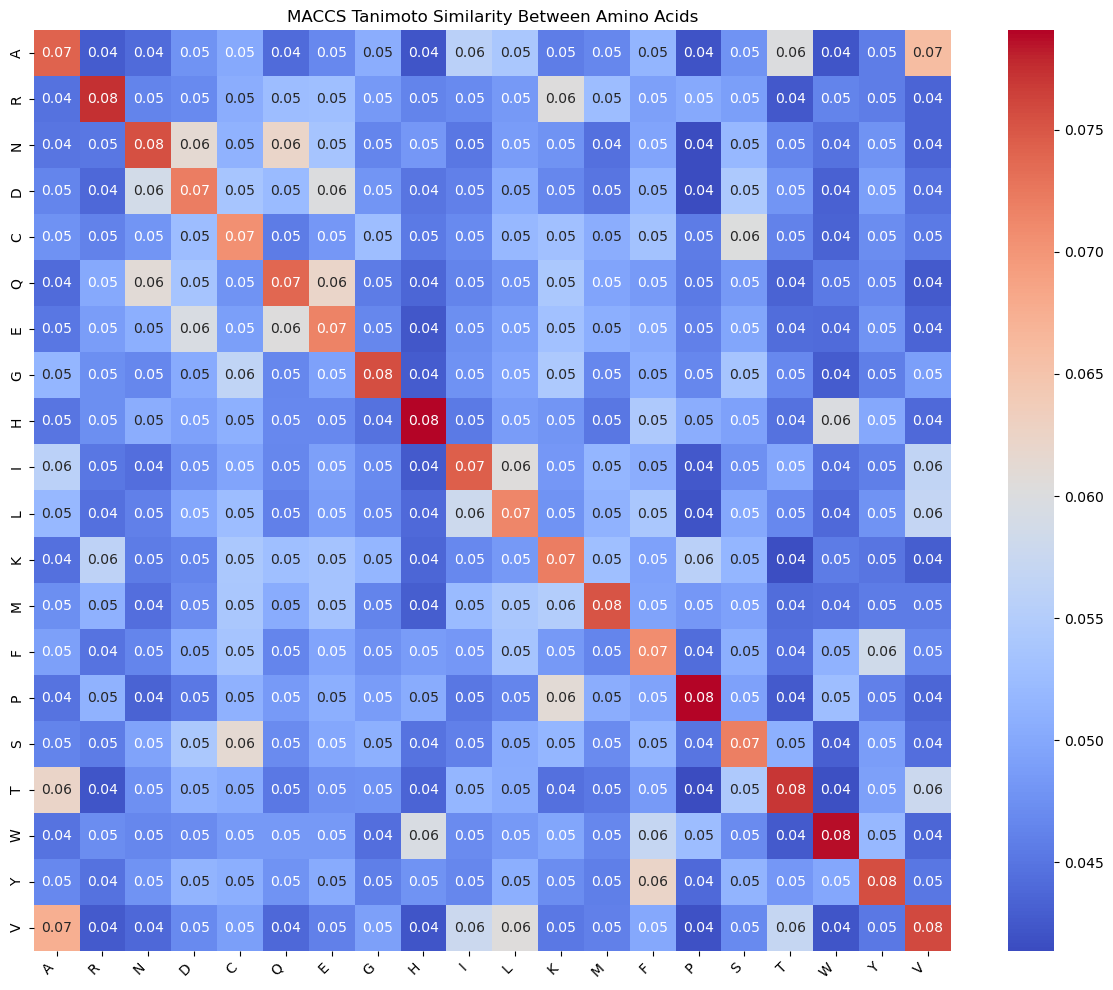

In [23]:

plt.figure(figsize=(12, 10))
sns.heatmap(df_sim_maccs_softmax, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('MACCS Tanimoto Similarity Between Amino Acids')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


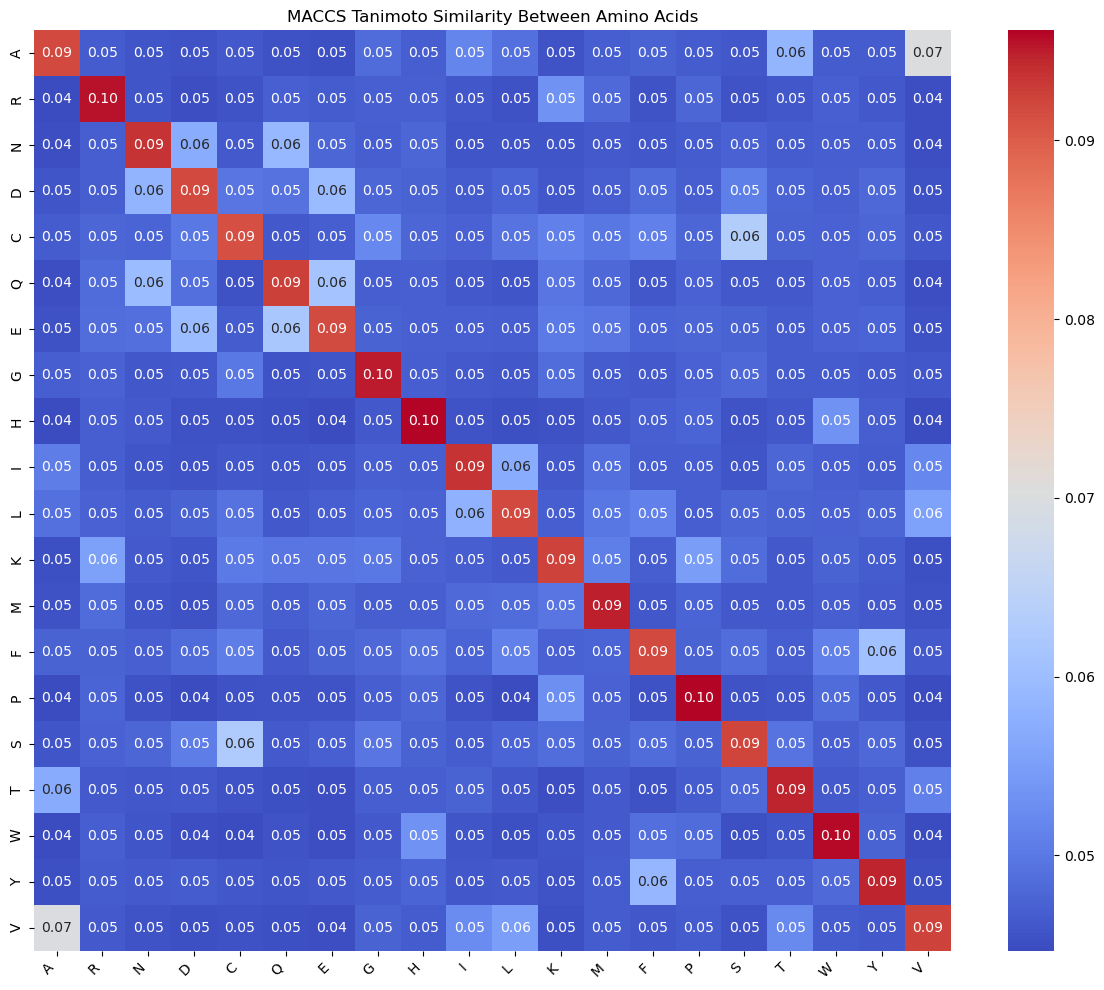

In [30]:

plt.figure(figsize=(12, 10))
sns.heatmap(df_sim_maccs_sigmoid_softmax, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('MACCS Tanimoto Similarity Between Amino Acids')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


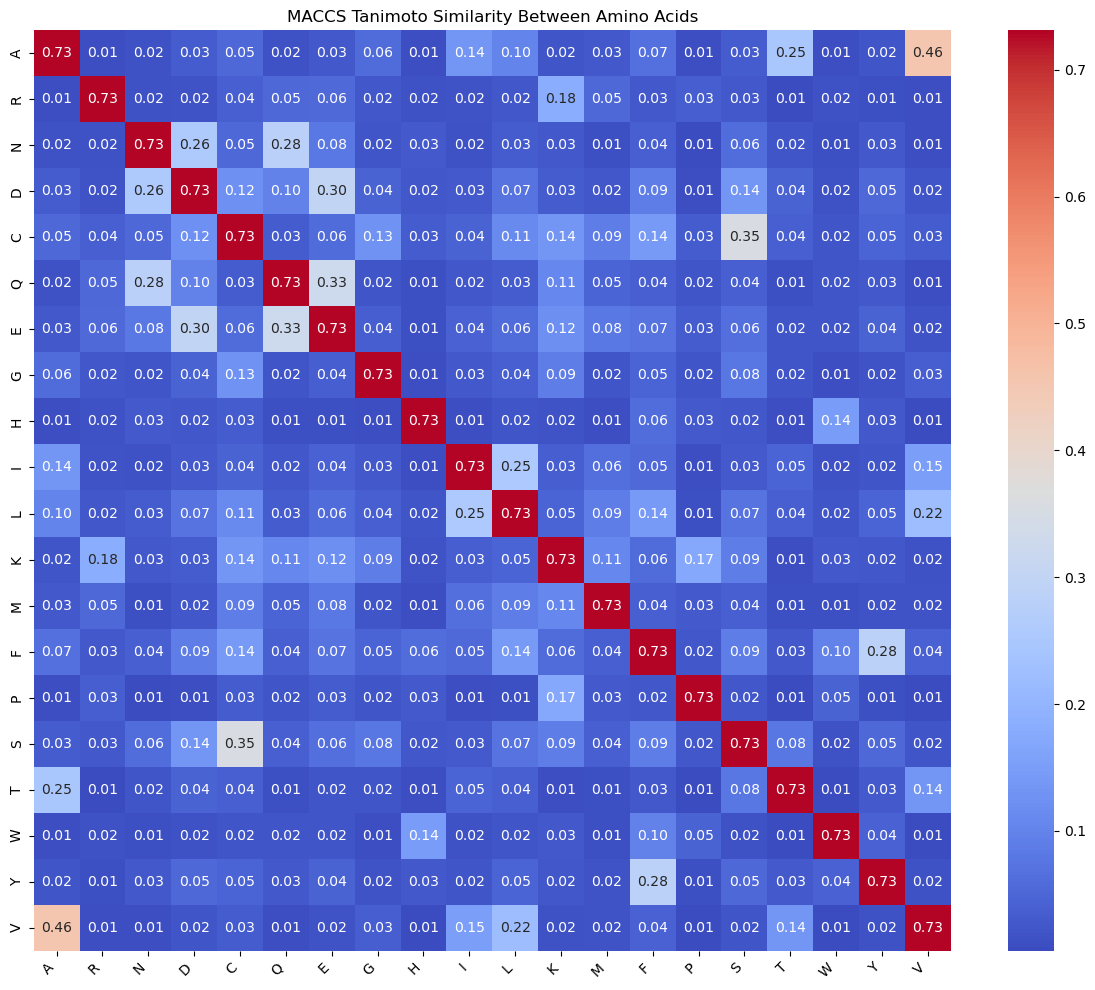

In [31]:
# have the sigmoid turning point be 0.9
def sigmoid(x, x0=0.9):
    """ Sigmoid function with a turning point at x0.
    """
    return 1 / (1 + np.exp(-10 * (x - x0)))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)
# apply it on matrix_maccs  
matrix_maccs_sigmoid = sigmoid(matrix_maccs, x0=0.9)
df_sim_maccs_sigmoid = pd.DataFrame(matrix_maccs_sigmoid, index=names, columns=names)


plt.figure(figsize=(12, 10))
sns.heatmap(df_sim_maccs_sigmoid, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('MACCS Tanimoto Similarity Between Amino Acids')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


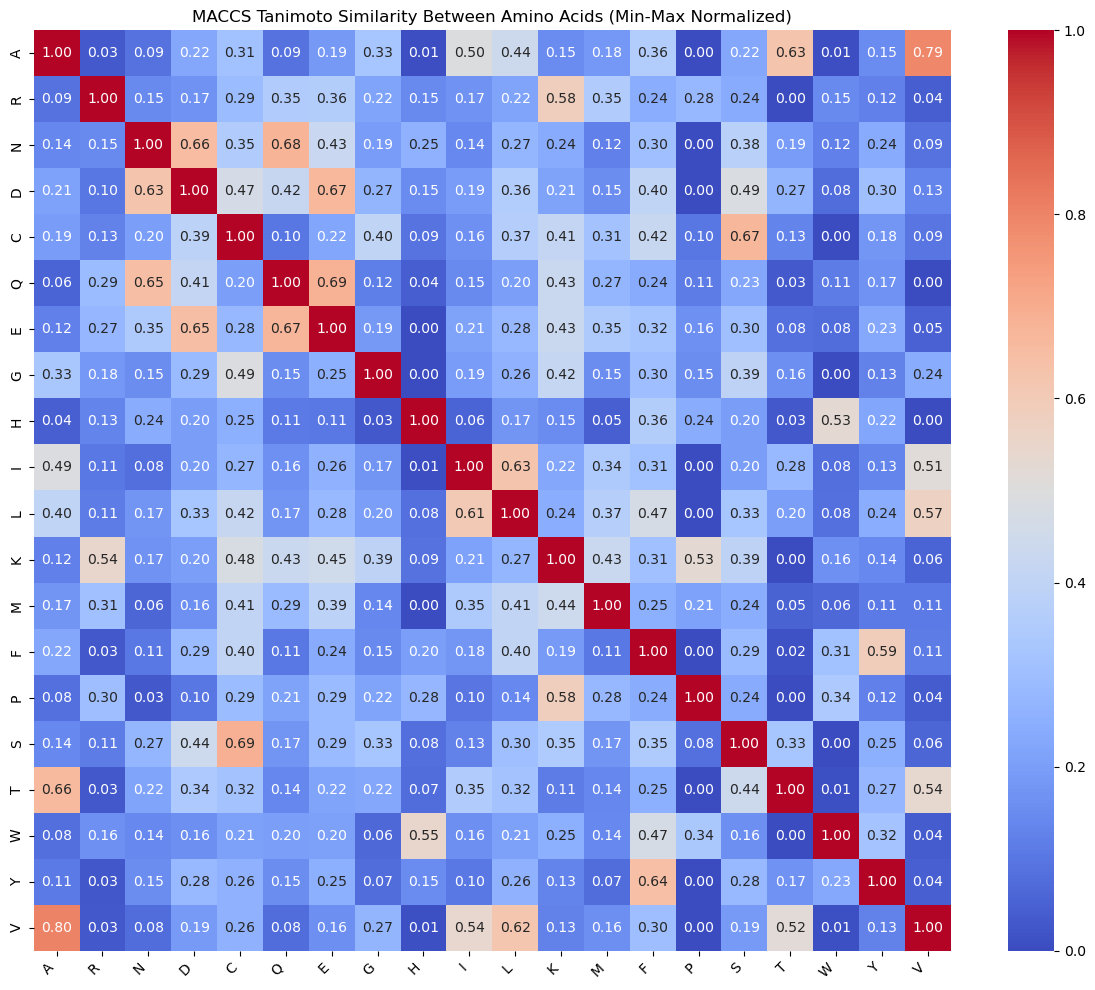

In [44]:
# min max normalize along a row and then make symmetric. Make it symmetric by averaging the values
def min_max_normalization(matrix):
    """ Normalize a matrix using min-max normalization.
    then average the values to make it symmetric.
    0 becomes 0, 1 becomes 1, and everything else is scaled between 0 and 1.    
    """
    min_val = np.min(matrix, axis=1, keepdims=True)
    max_val = np.max(matrix, axis=1, keepdims=True)
    normalized_matrix = (matrix - min_val) / (max_val - min_val)
    return normalized_matrix


# function to normalize so each row and column sums to 1
def normalize_matrix(matrix):
    """ Normalize a matrix so that each row and column sums to 1.
    """
    row_sums = matrix.sum(axis=1, keepdims=True)
    col_sums = matrix.sum(axis=0, keepdims=True)
    normalized_matrix = matrix / (row_sums + col_sums - np.diag(np.diag(matrix)))  # avoid double counting diagonal
    return normalized_matrix    
   


matrix_maccs_min_max = min_max_normalization(matrix_maccs)
df_sim_maccs_min_max = pd.DataFrame(matrix_maccs_min_max, index=names, columns=names)
plt.figure(figsize=(12, 10))
sns.heatmap(df_sim_maccs_min_max, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('MACCS Tanimoto Similarity Between Amino Acids (Min-Max Normalized)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


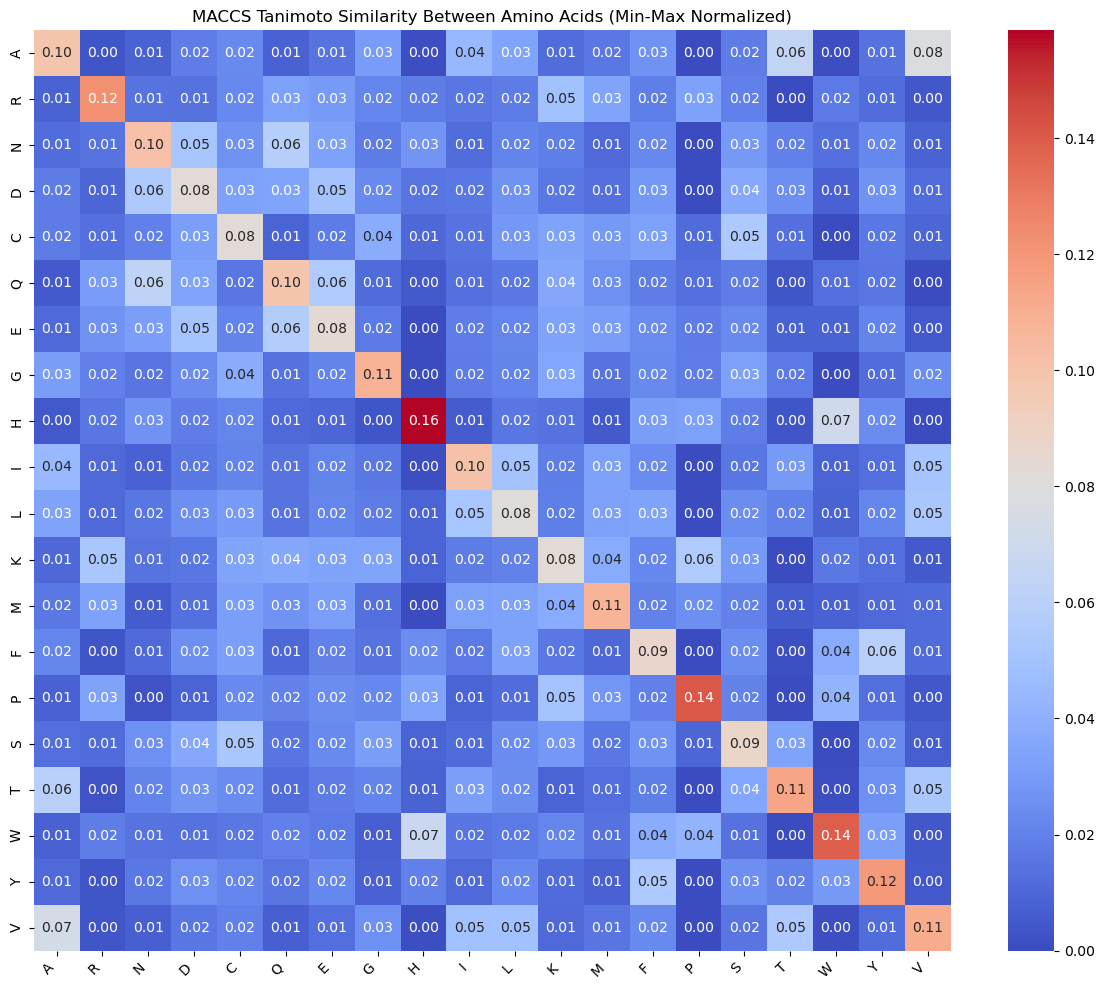

In [41]:
matrix_maccs_min_max_normalized = normalize_matrix(min_max_normalization(matrix_maccs))
df_sim_maccs_min_max_norm = pd.DataFrame(matrix_maccs_min_max_normalized, index=names, columns=names)
plt.figure(figsize=(12, 10))
sns.heatmap(df_sim_maccs_min_max_norm, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('MACCS Tanimoto Similarity Between Amino Acids (Min-Max Normalized)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [38]:
np.sum(matrix_maccs_min_max_normalized[1])

np.float64(0.5055050079658938)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

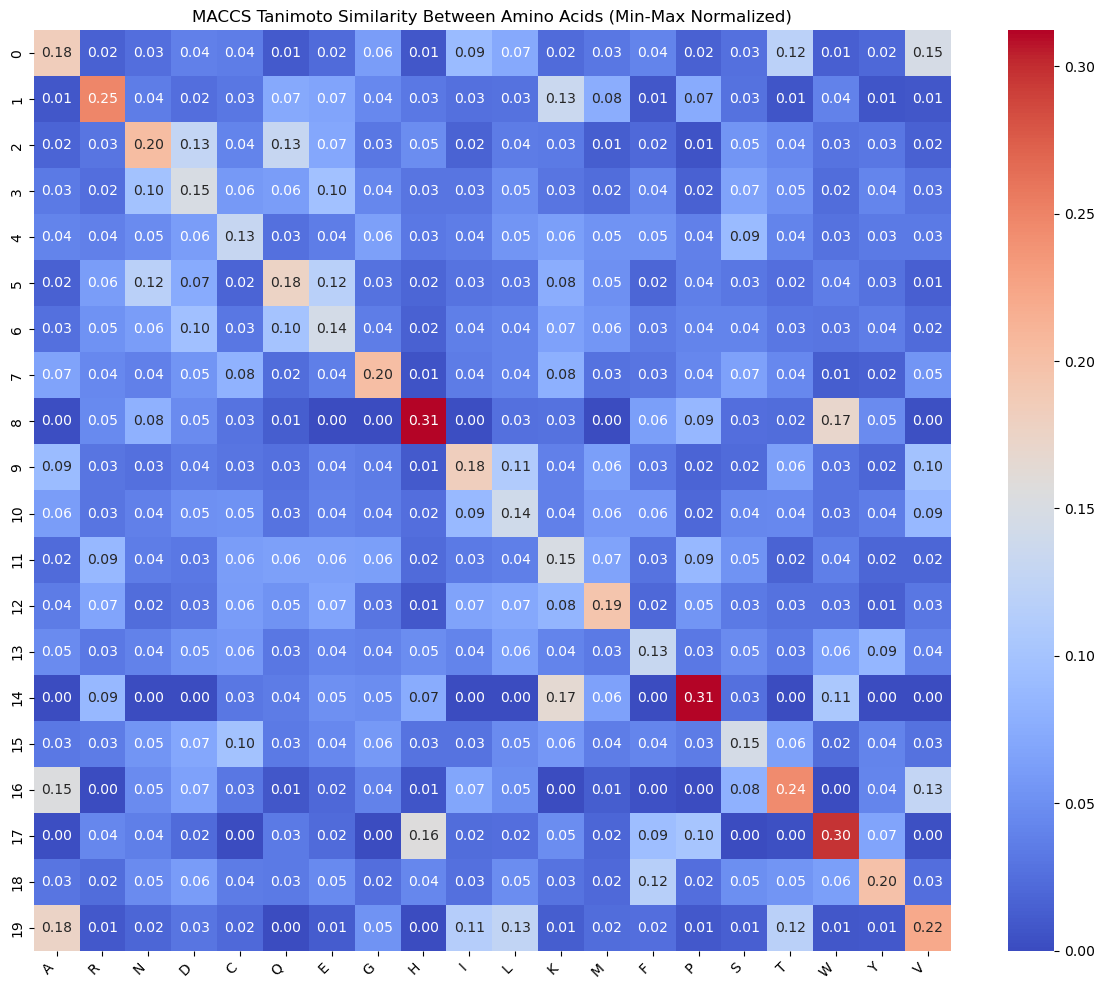

In [20]:
# Min-max normalization
scaler = MinMaxScaler()
df_minmax = pd.DataFrame(scaler.fit_transform(df_sim_maccs), columns=df_sim_maccs.columns)

# Normalize the rows to sum to one
df_normalized = df_minmax.div(df_minmax.sum(axis=1), axis=0)

plt.figure(figsize=(12, 10))
sns.heatmap(df_normalized, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('MACCS Tanimoto Similarity Between Amino Acids (Min-Max Normalized)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


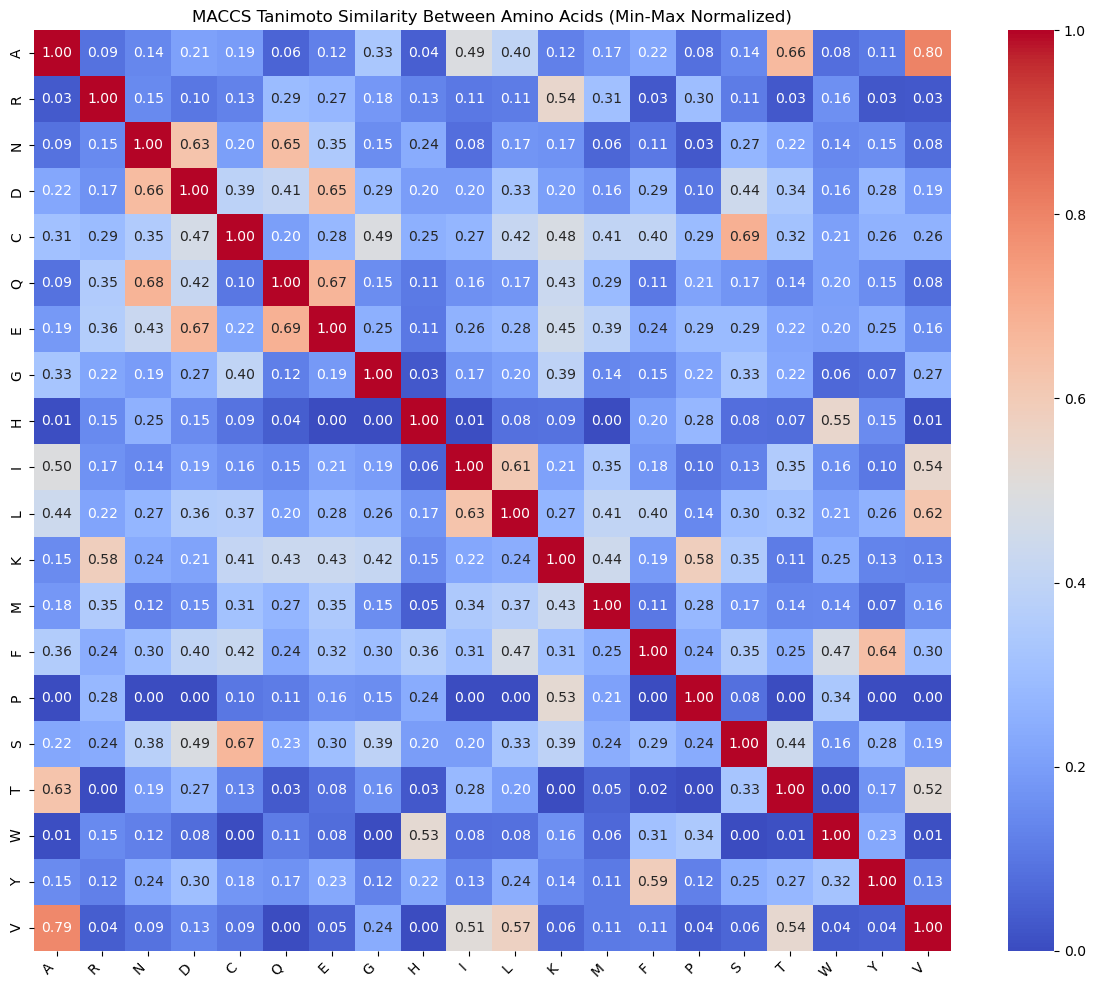

In [58]:
df_minmax.index = df_minmax.columns
plt.figure(figsize=(12, 10))
sns.heatmap(df_minmax, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('MACCS Tanimoto Similarity Between Amino Acids (Min-Max Normalized)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

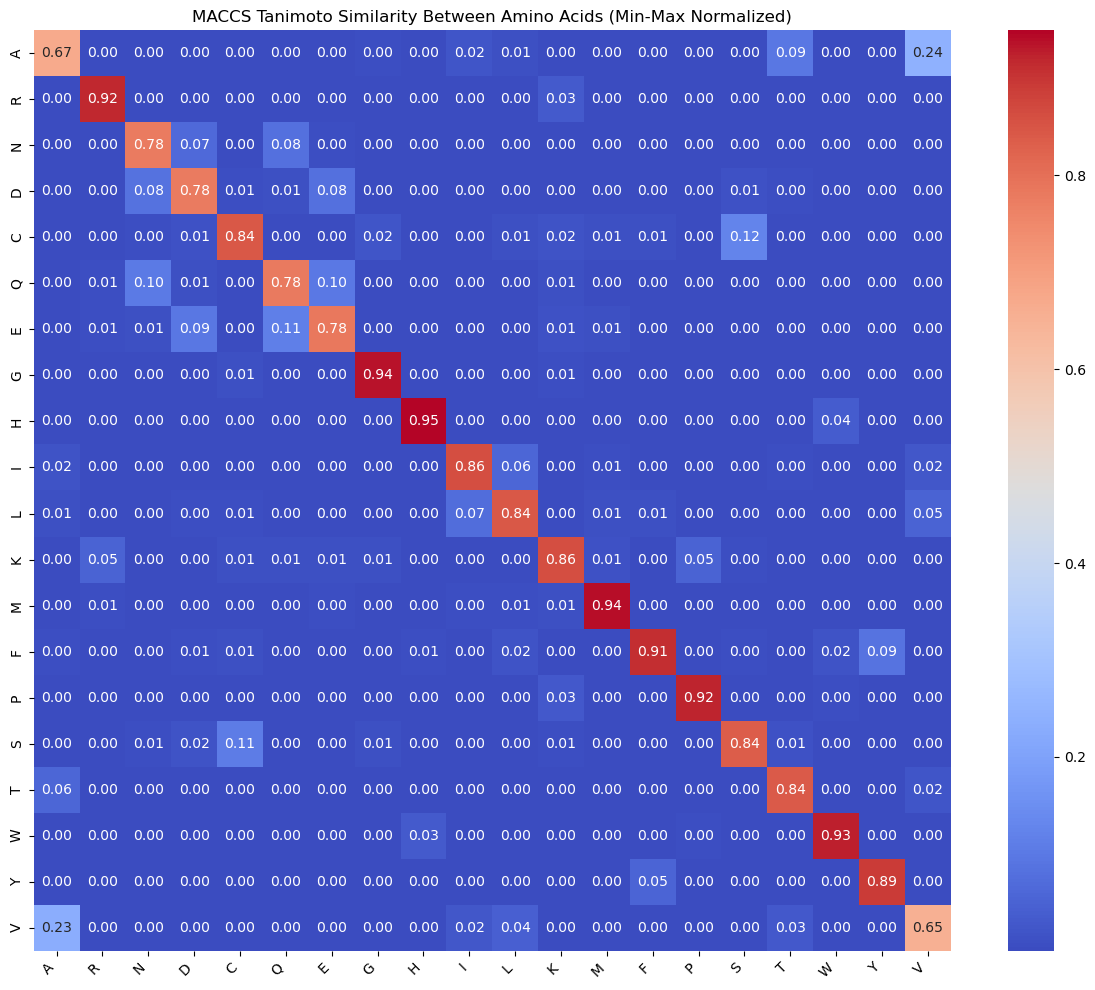

In [ ]:
scaler = MinMaxScaler()
df_minmax = pd.DataFrame(scaler.fit_transform(df_sim_maccs), columns=df_sim_maccs.columns)
df_minmax_sm09 = sigmoid(df_minmax, 0.9)
# column normalization
df_normalized_mm_sm09 = df_minmax_sm09.div(df_minmax_sm09.sum(axis=0), axis=1)
df_normalized_mm_sm09.index = df_minmax_sm09.columns

plt.figure(figsize=(12, 10))
sns.heatmap(df_normalized_mm_sm09, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('MACCS Tanimoto Similarity Between Amino Acids (Min-Max Normalized)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

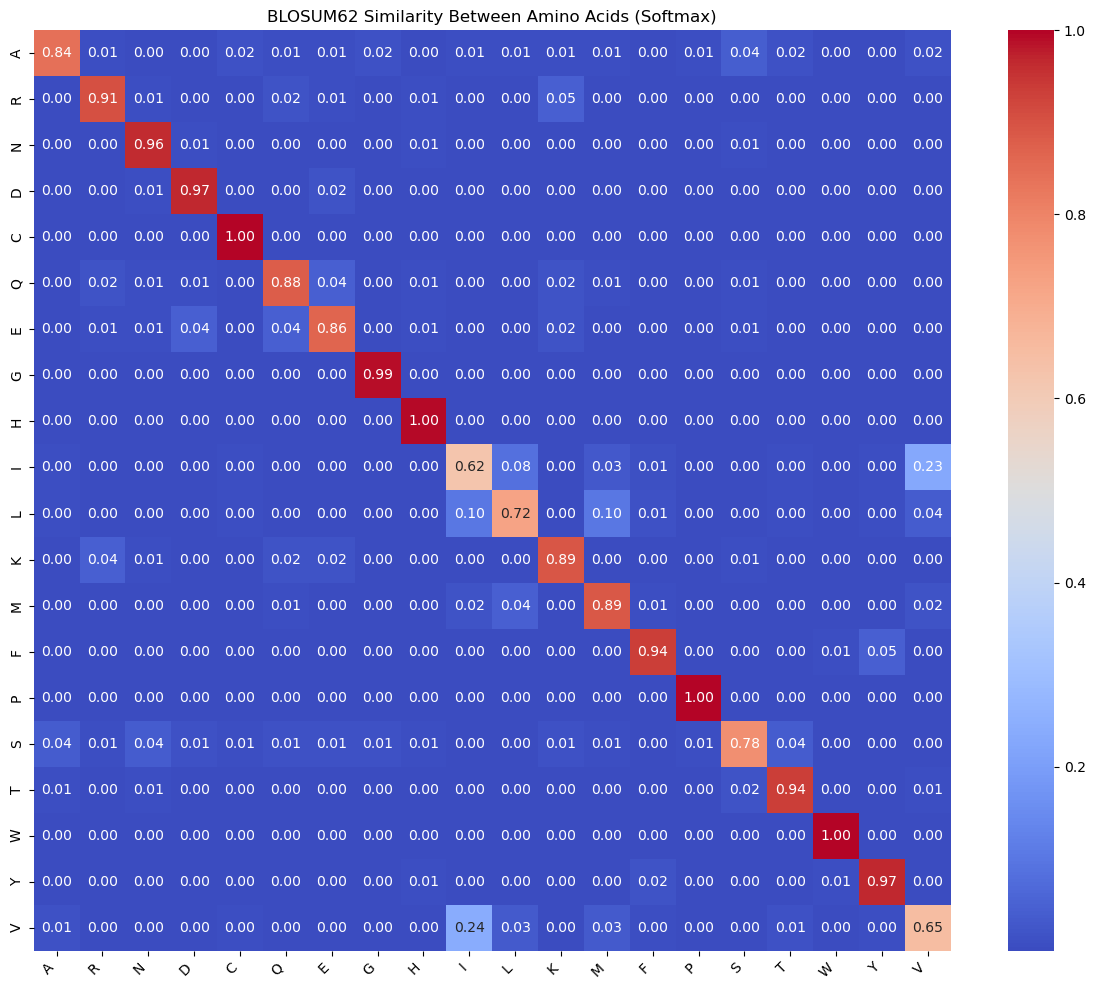

In [55]:
df_blosum62_softmax = pd.DataFrame(blosum62_softmax, index=list(amino_acids), columns=list(amino_acids))
plt.figure(figsize=(12, 10))
sns.heatmap(df_blosum62_softmax, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('BLOSUM62 Similarity Between Amino Acids (Softmax)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

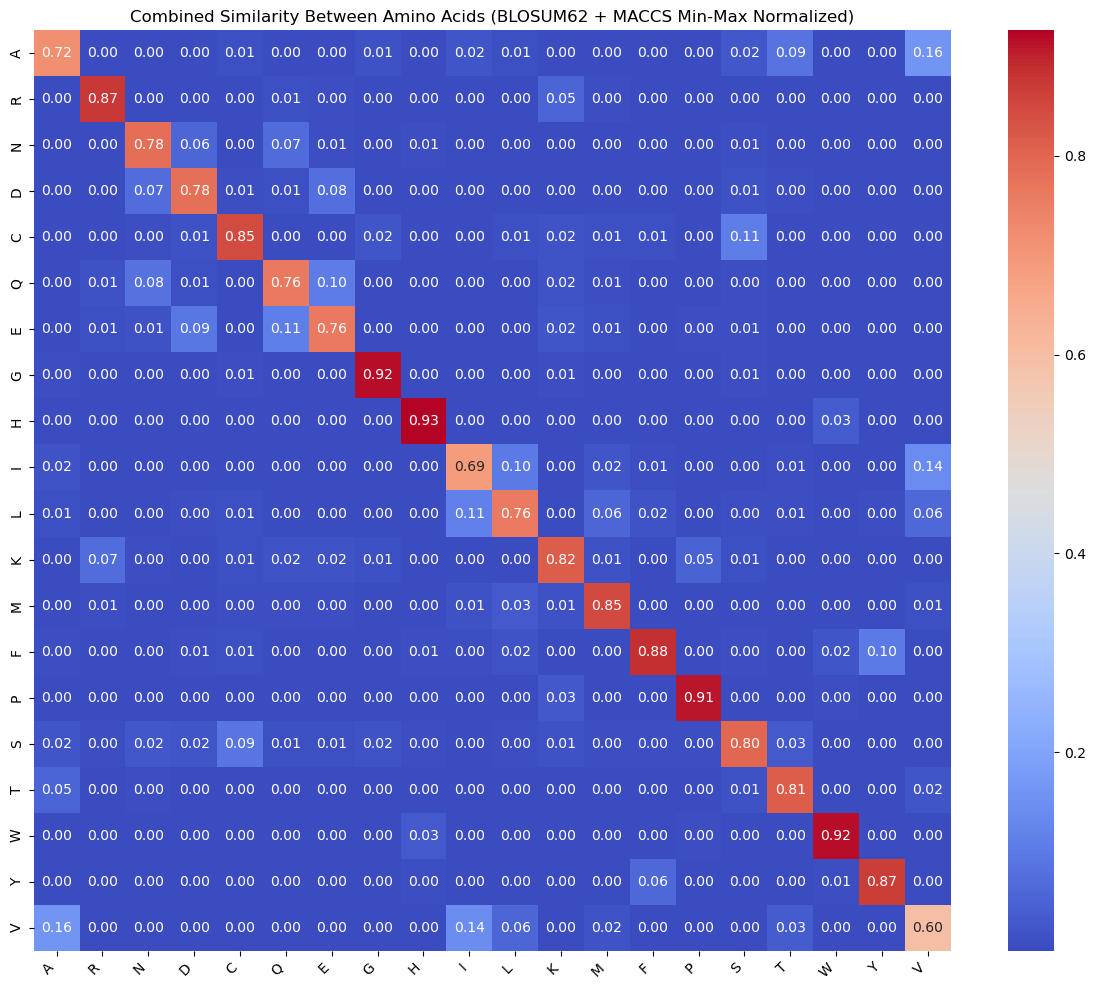

In [56]:
# add up df_blosum62_softmax and df_sim_maccs_min_max_norm
df_combined = df_blosum62_softmax + df_normalized_mm_sm09
df_combined = df_combined.div(df_combined.sum(axis=0), axis=1)

plt.figure(figsize=(12, 10))
sns.heatmap(df_combined, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Combined Similarity Between Amino Acids (BLOSUM62 + MACCS Min-Max Normalized)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [74]:
df_combined.sum(axis=0)

A    1.0
R    1.0
N    1.0
D    1.0
C    1.0
Q    1.0
E    1.0
G    1.0
H    1.0
I    1.0
L    1.0
K    1.0
M    1.0
F    1.0
P    1.0
S    1.0
T    1.0
W    1.0
Y    1.0
V    1.0
dtype: float64

In [75]:
df_combined.to_csv('intermediates/df_combined_for_one_hot.csv')